In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set_theme(font_scale = 2)

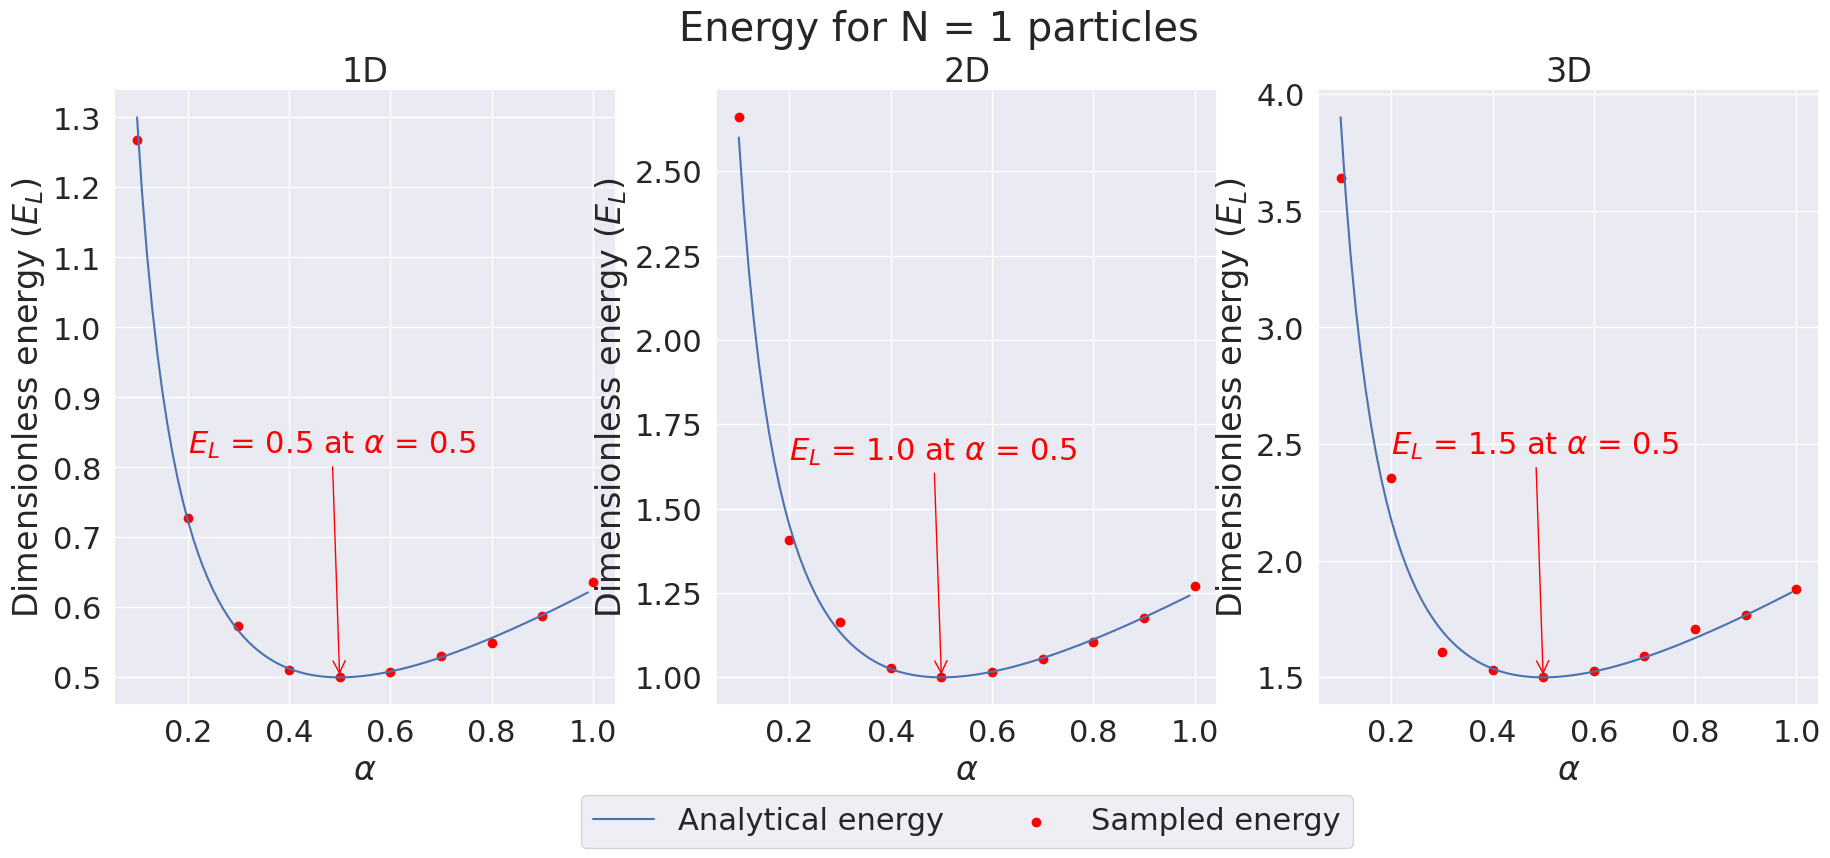

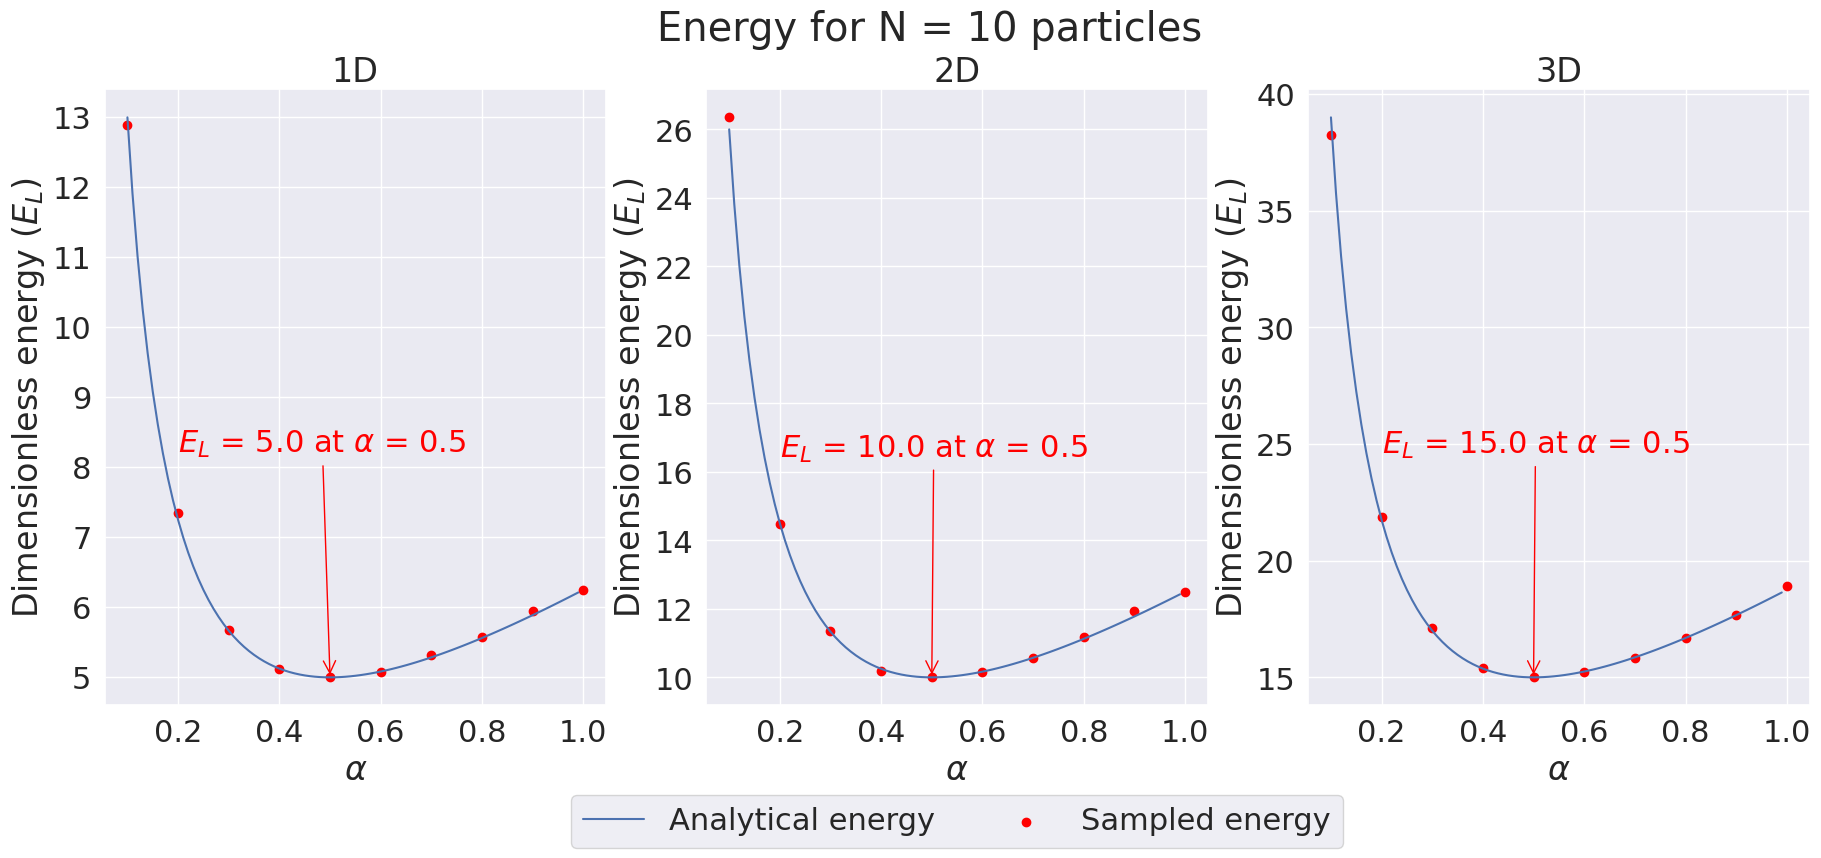

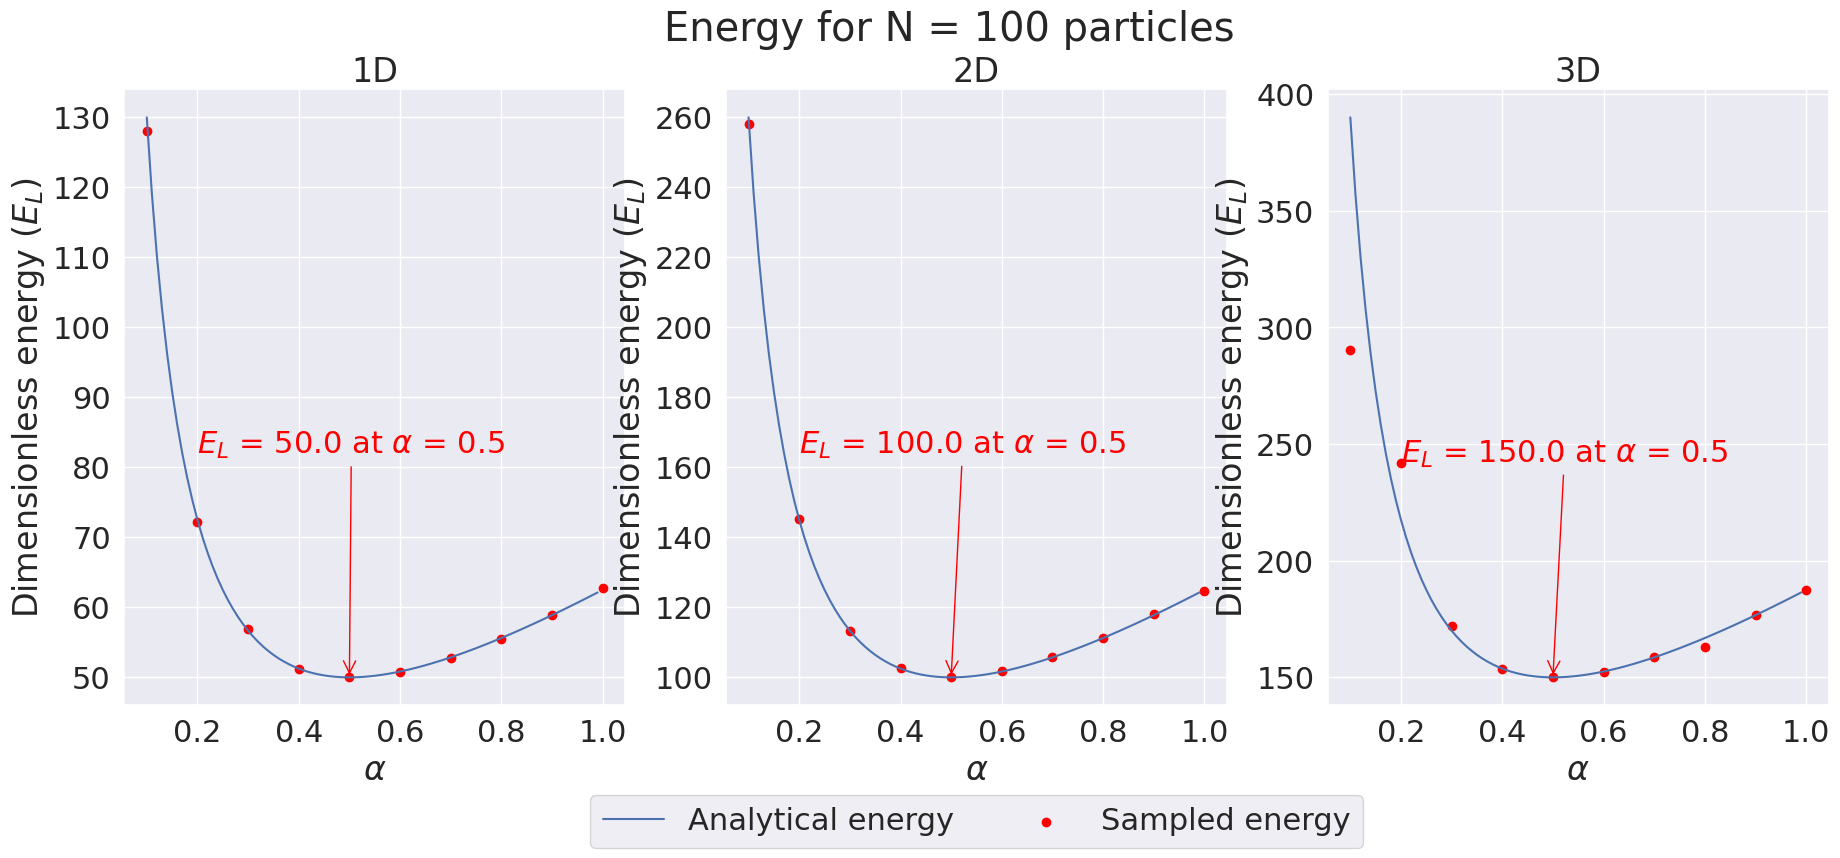

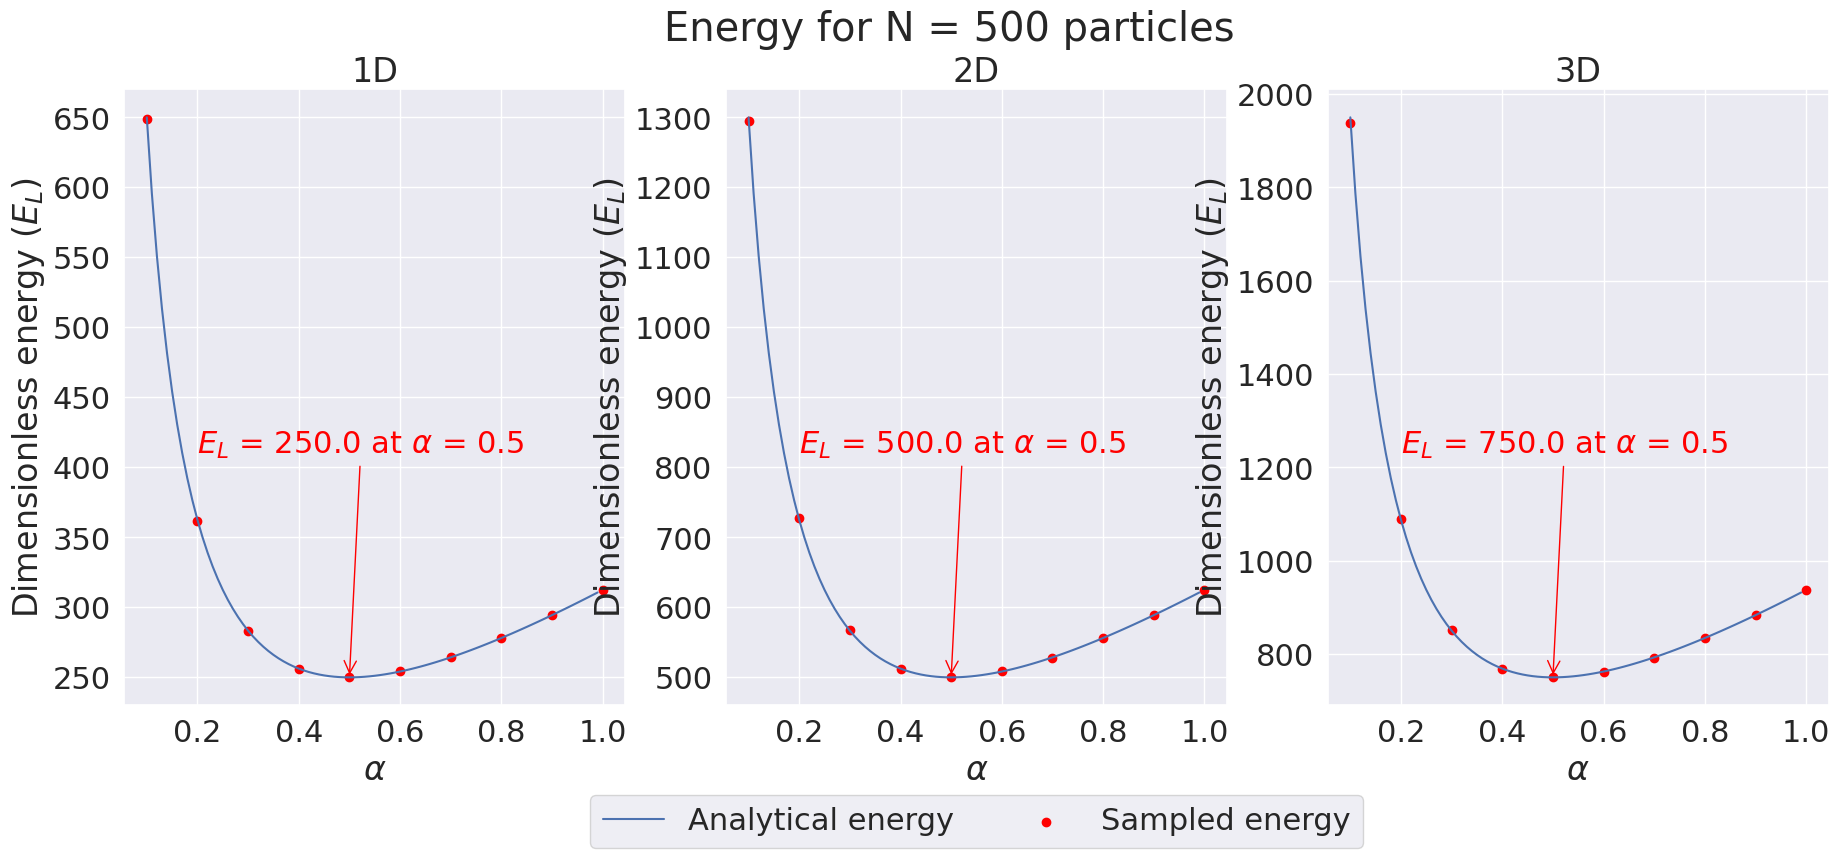

In [73]:
def analytical_energy(alpha, N_dim, N_particles):
    y = alpha/2 + 1/(8*alpha)
    return y*N_dim*N_particles
alpha = np.arange(0.1, 1, 0.01)
arrowprops = dict(arrowstyle="->", color = 'red')
for N in [1, 10, 100, 500]:
    fig, axs = plt.subplots(1, 3, figsize = (22, 8))
    for index, d in enumerate([1, 2, 3]):
        df = pd.read_csv(f'../output/N={N}_d={d}_energy.csv')
        N_dim = df.d.iloc[0]
        N_particles = df.N.iloc[0]

        min_energy = df['energy'].min()
        min_alpha = df[df.energy == min_energy]['alpha'].iloc[0]
        
        axs[index].plot(alpha, analytical_energy(alpha, N_dim, N_particles), label = 'Analytical energy')
        axs[index].scatter(x = df['alpha'],y =  df['energy'], label = 'Sampled energy', color = 'red')
        axs[index].set_xlabel(r'$\alpha$')
        axs[index].set_ylabel(r'Dimensionless energy $(E_L)$')
        axs[index].annotate(r'$E_L$'+ f' = {min_energy} at '+r'$\alpha$'+f' = {min_alpha}',
                            xy=(min_alpha, min_energy), 
                            xytext=(min_alpha-0.3, min_energy+0.5*df.energy.mean()),
                            arrowprops=arrowprops, size = 22, color = 'red')
        axs[index].set_title(f'{d}D')
    tlt = fig.suptitle(f'Energy for N = {N_particles} particles')
    lgd = axs[1].legend(loc = 'upper center', ncol = 2, fancybox = True, bbox_to_anchor = (0.5, -0.12))
    #plt.savefig(f'N={N}_energy.pdf', bbox_extra_artists=(lgd,tlt), bbox_inches='tight')
    plt.show()

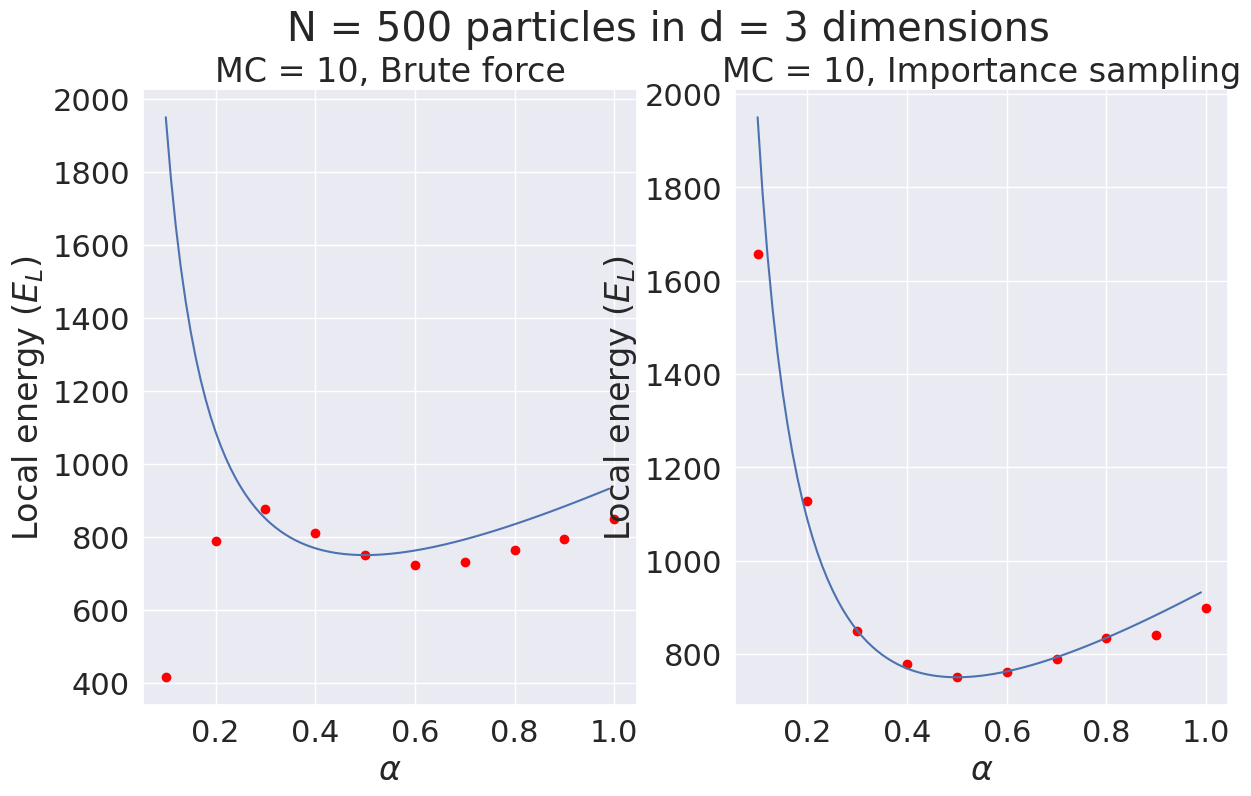

In [103]:
N = 500
d = 3
fig, axs = plt.subplots(1, 2, figsize = (14, 8))
titlename = ['Brute force', 'Importance sampling']
for index, name in enumerate([f'../output/N={N}_d={d}_energy.csv', f'../output/N={N}_d={d}_IS_energy.csv']):
    df = pd.read_csv(name)
    N_dim = df.d.iloc[0]
    N_particles = df.N.iloc[0]
    MC_cyles = df.MC.iloc[0]

    min_energy = df['energy'].min()
    min_alpha = df[df.energy == min_energy]['alpha'].iloc[0]

    axs[index].plot(alpha, analytical_energy(alpha, N_dim, N_particles), label = 'Analytical energy')
    axs[index].scatter(x = df['alpha'],y =  df['energy'], label = 'Sampled energy', color = 'red')
    axs[index].set_xlabel(r'$\alpha$')
    """axs[index].annotate(r'$E_L$'+ f' = {min_energy} at '+r'$\alpha$'+f' = {min_alpha}',
                        xy=(min_alpha, min_energy), 
                        xytext=(min_alpha-0.3, min_energy+0.5*df.energy.mean()),
                        arrowprops=arrowprops, size = 16, color = 'red')
    """
    axs[index].set_title(f'MC = {MC_cyles}, {titlename[index]}')
    fig.suptitle(f'N = {N_particles} particles in d = {d} dimensions')
    axs[index].set_ylabel(r'Local energy $(E_L)$')
#lgd = axs[0].legend(loc = 'upper center', ncol = 2, fancybox = True, bbox_to_anchor = (0.5, -0.12))
#fig.tight_layout()
plt.show()

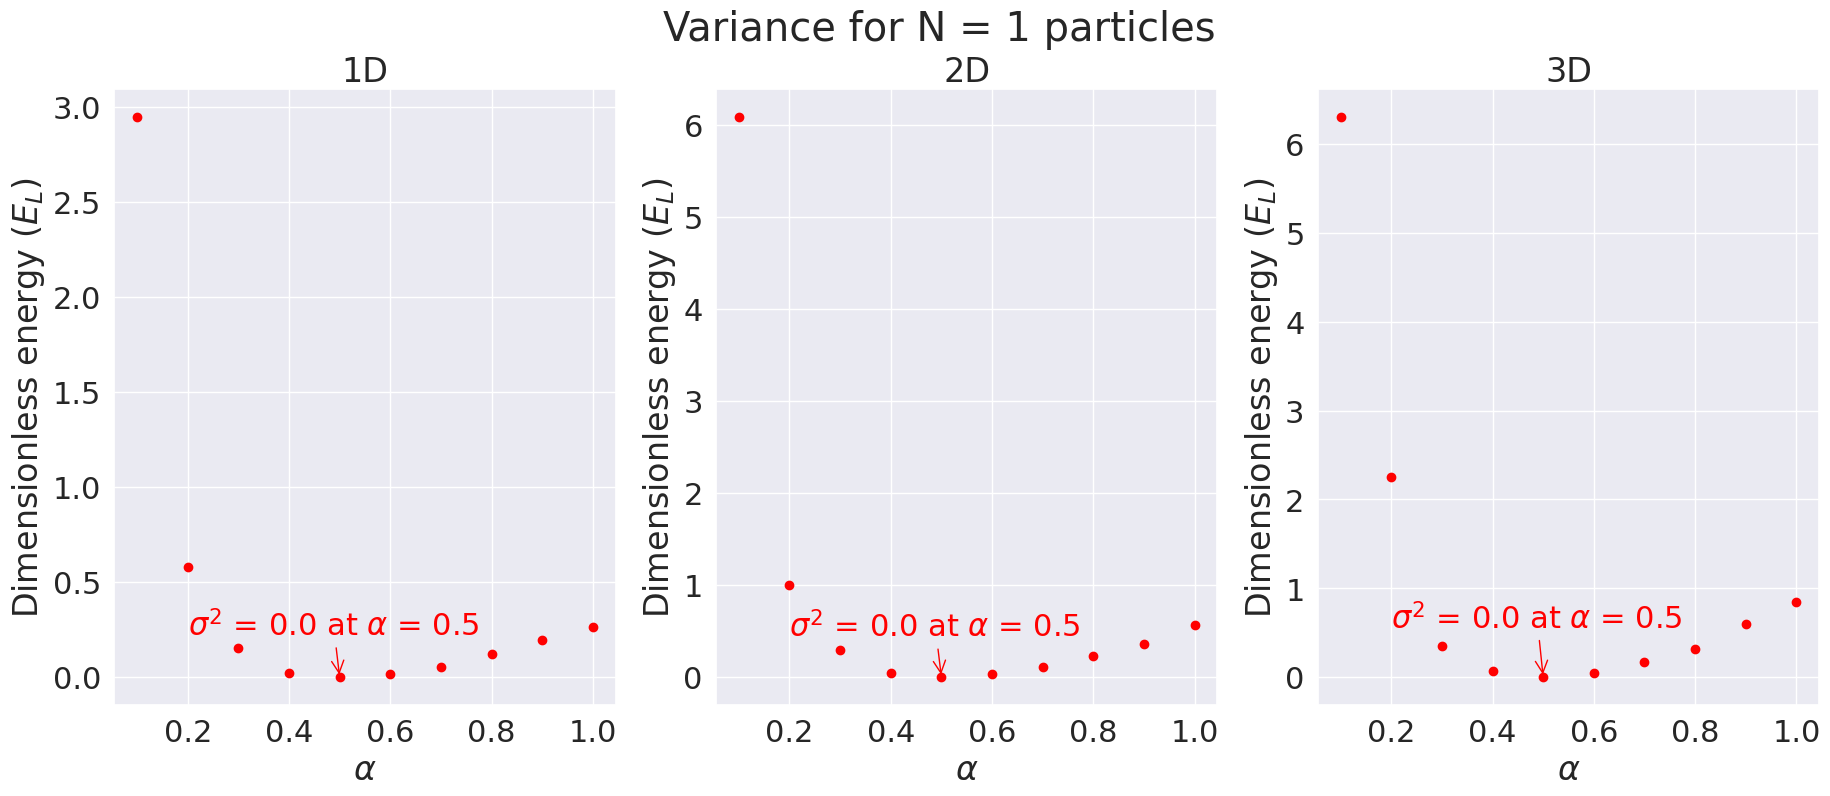

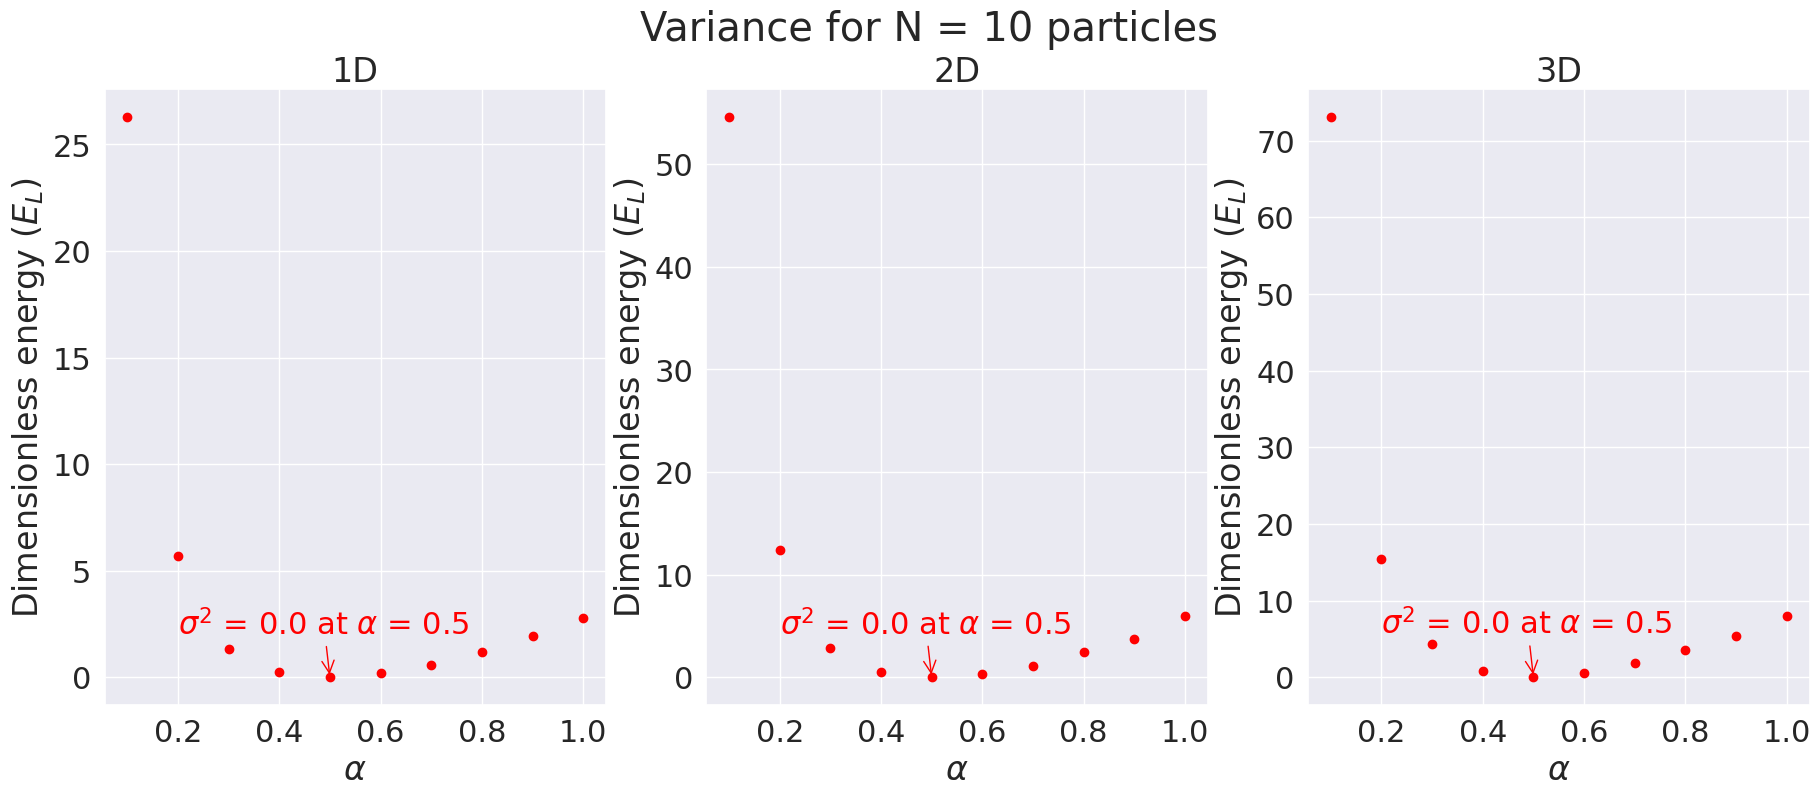

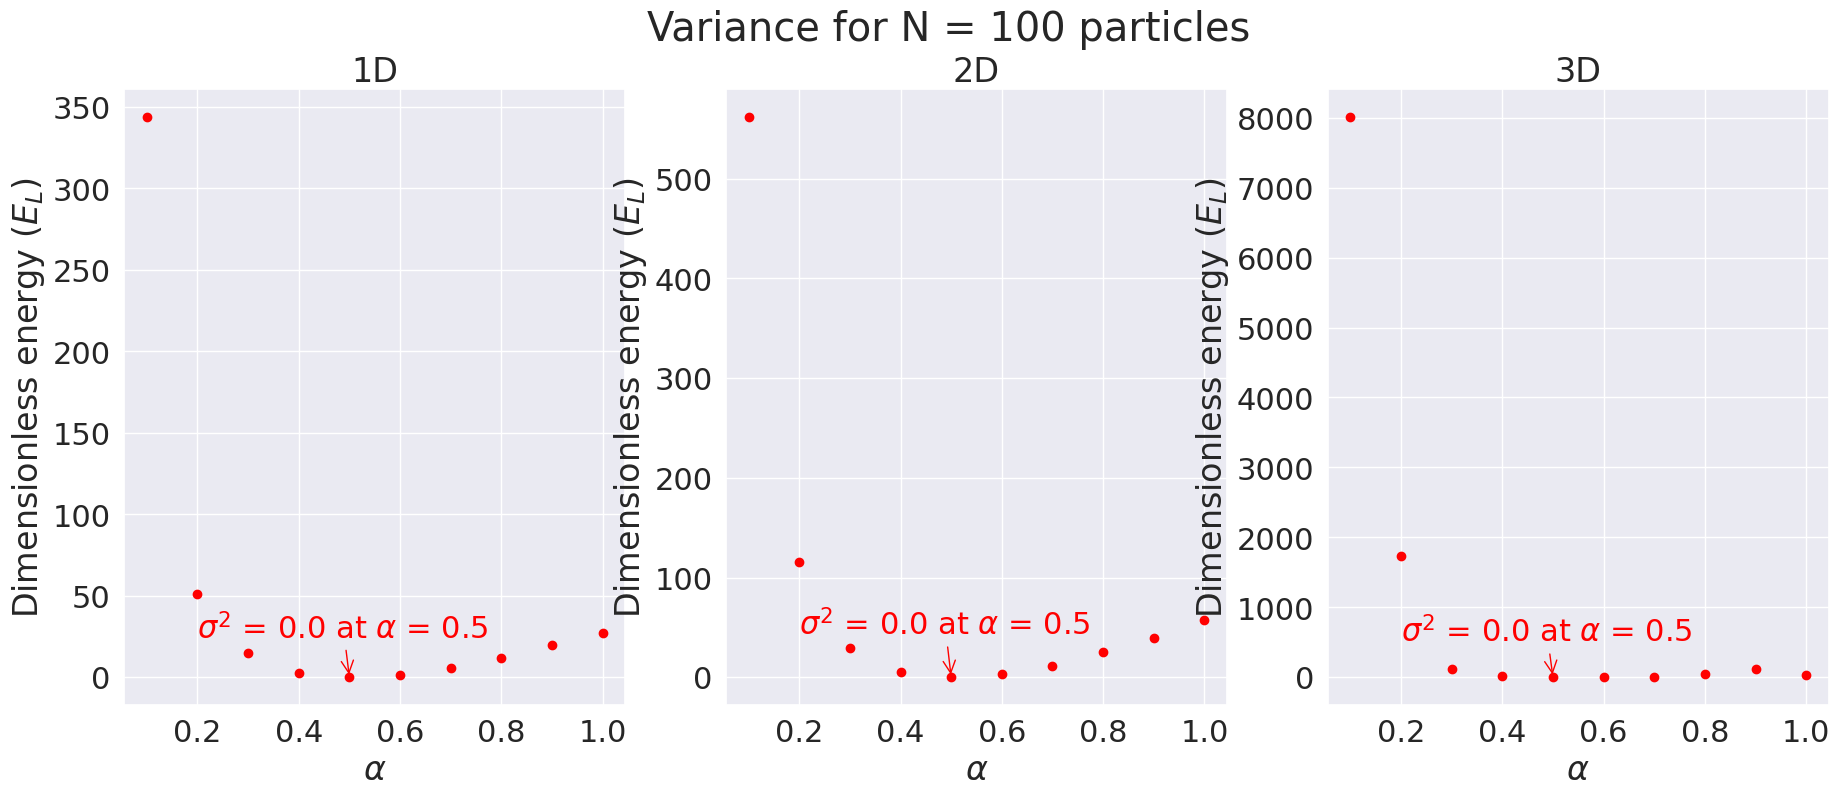

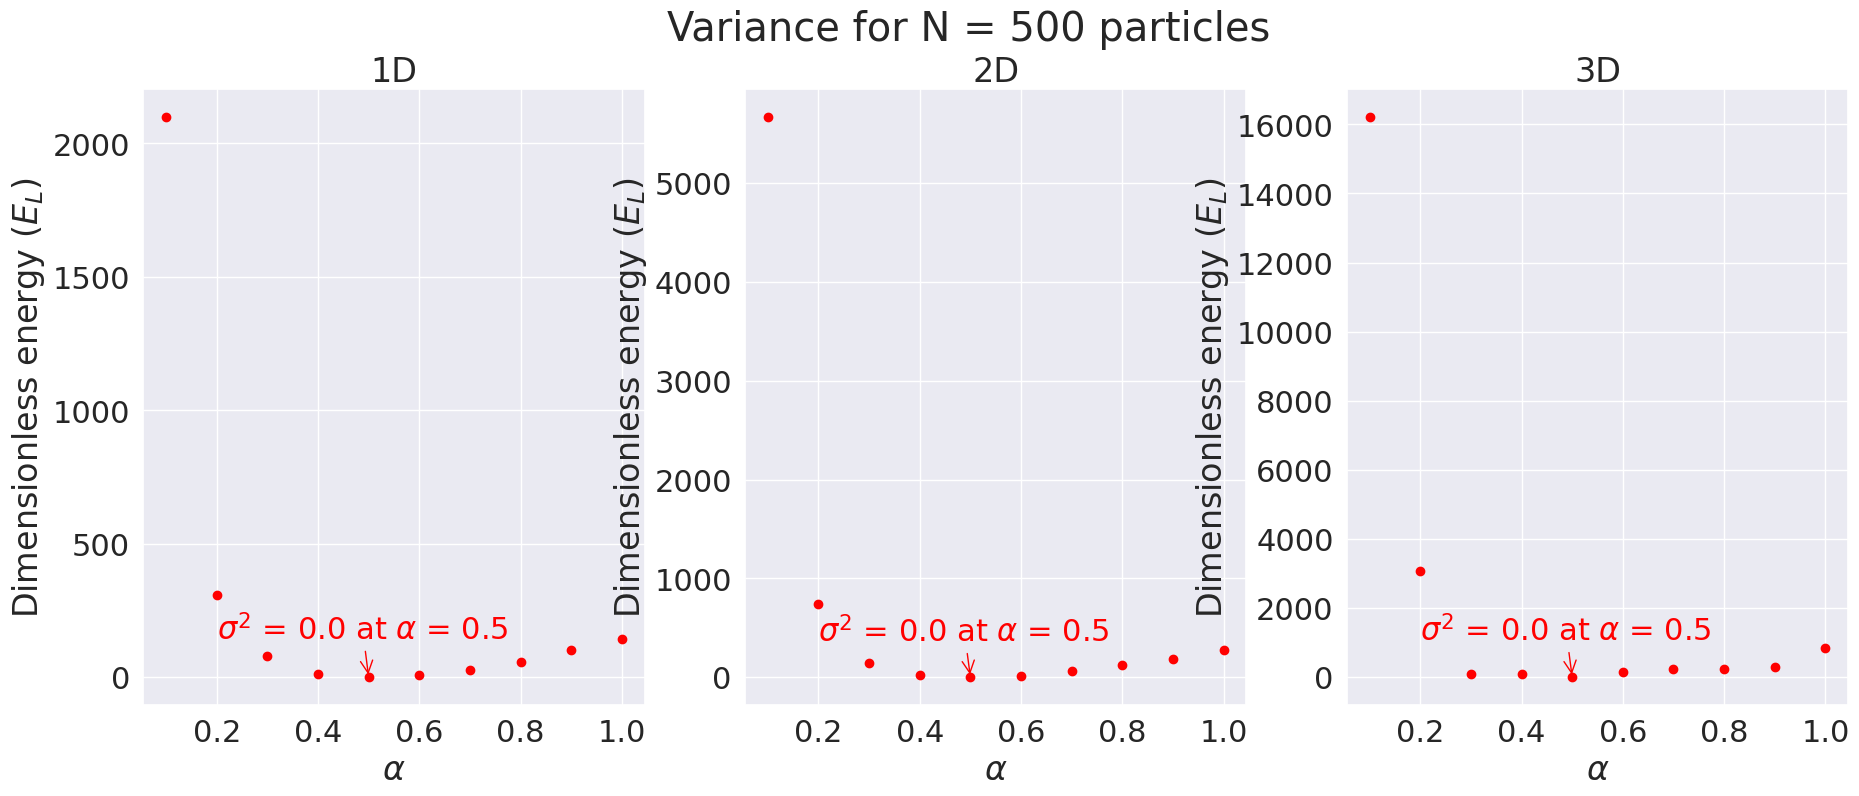

In [105]:
for N in [1, 10, 100, 500]:
    fig, axs = plt.subplots(1, 3, figsize = (22, 8))
    for index, d in enumerate([1, 2, 3]):
        df = pd.read_csv(f'../output/N={N}_d={d}_energy.csv')
        N_dim = df.d.iloc[0]
        N_particles = df.N.iloc[0]

        min_var = df['variance'].min()
        min_alpha = df[df.variance == min_var]['alpha'].iloc[0]
        
        axs[index].scatter(x = df['alpha'],y =  df['variance'], color = 'red')
        axs[index].set_xlabel(r'$\alpha$')
        axs[index].set_ylabel(r'Dimensionless energy $(E_L)$')
        axs[index].annotate(r'$\sigma^2$'+ f' = {min_var} at '+r'$\alpha$'+f' = {min_alpha}',
                            xy=(min_alpha, min_var), 
                            xytext=(min_alpha-0.3, min_var+0.5*df.variance.mean()),
                            arrowprops=arrowprops, size = 22, color = 'red')
        axs[index].set_title(f'{d}D')
    tlt = fig.suptitle(f'Variance for N = {N_particles} particles')
    plt.show()